# **Hypothesis Testing**

Joseph Lardie

September 2023

# **Imports**

In [1]:
# Numpy
import numpy as np

# Pandas
import pandas as pd

# Seaborn
import seaborn as sns

# matplotlib
import matplotlib.pyplot as plt
import plotly

# Scipy
from scipy import stats
from scipy.stats import norm, pearsonr, zscore
import statsmodels.api as sm

# Warnings
import warnings
warnings.filterwarnings("ignore")

## **Loading in datasets**

In [2]:
# Loading NYC Restaraunt Inspection Data
rdf = pd.read_csv('rdf')

In [3]:
# Loading NYC Restaraunt Yelp Review Data
ydf = pd.read_csv('ydf')

In [4]:
# Restaurant Inspection data
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211821 entries, 0 to 211820
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  211821 non-null  int64  
 1   DBA                    211134 non-null  object 
 2   BORO                   211821 non-null  object 
 3   BUILDING               211525 non-null  object 
 4   STREET                 211818 non-null  object 
 5   ZIPCODE                209132 non-null  float64
 6   CUISINE DESCRIPTION    209364 non-null  object 
 7   INSPECTION DATE        211821 non-null  object 
 8   ACTION                 209364 non-null  object 
 9   VIOLATION CODE         208235 non-null  object 
 10  VIOLATION DESCRIPTION  208235 non-null  object 
 11  CRITICAL FLAG          211821 non-null  object 
 12  SCORE                  201644 non-null  float64
 13  GRADE                  103435 non-null  object 
 14  GRADE DATE             94661 non-nul

In [5]:
# Yelp data
ydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   alias         847 non-null    object 
 1   name          847 non-null    object 
 2   image_url     847 non-null    object 
 3   url           847 non-null    object 
 4   review_count  847 non-null    int64  
 5   categories    847 non-null    object 
 6   rating        847 non-null    float64
 7   coordinates   847 non-null    object 
 8   transactions  847 non-null    object 
 9   location      847 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 66.3+ KB


## **Selecting Subset of Pizza Restaurants in Brooklyn**

In [6]:
# Selecting subset of only restaurants from Brooklyn
brooklyndf = rdf[rdf['BORO'].str.lower() == 'brooklyn']

In [7]:
# Selecting subset of only restaurants in Brooklyn that have pizza in the cuisine description
pizza_brooklyn_subset = brooklyndf[(brooklyndf['CUISINE DESCRIPTION'].str.lower() == 'pizza')]

In [8]:
# Filtering out rows with NaN in the 'GRADE' column
pizza_brooklyn_subset = pizza_brooklyn_subset.dropna(subset=['GRADE'])

In [9]:
# Taking a look at Brooklyn pizza restaurants in inspection data
print(pizza_brooklyn_subset)

           CAMIS                   DBA      BORO BUILDING  \
43      40574680          PETE'S PLACE  Brooklyn     5620   
529     41387129  B'KLYN'S PIZZA JOINT  Brooklyn     1406   
776     50089510          ROSA'S PIZZA  Brooklyn      374   
934     41273383     LA BELLA PIZZERIA  Brooklyn     8509   
1098    50105087          LUIGIS PIZZA  Brooklyn     1049   
...          ...                   ...       ...      ...   
210942  40759928          NINO'S PIZZA  Brooklyn     9110   
211050  50086955         MARIO'S PIZZA  Brooklyn     1381   
211563  40383044           PIZZA WAGON  Brooklyn     8606   
211613  40384662           J & R PIZZA  Brooklyn     1916   
211734  50093899       NONNAS PIZZERIA  Brooklyn      253   

                       STREET  ZIPCODE CUISINE DESCRIPTION INSPECTION DATE  \
43                   1 AVENUE  11220.0               Pizza      11/13/2023   
529                 86 STREET  11228.0               Pizza      09/27/2023   
776       METROPOLITAN AVENUE  11

## **Merging Yelp data with Inspections Data**

In [10]:
# Making the names of the restaurants in both data sets compatable for the merge
column_name = 'name'
# Matching up the names for both datasets
ydf['name'] = ydf['name'].apply(lambda x: str(x).upper())

In [11]:
# Merging the two data sets on the names of the restaurants 
merged_df = pd.merge(pizza_brooklyn_subset, ydf, left_on='DBA', right_on='name', how='inner', indicator=True)

# Dropping any Duplicate rows
merged_df.drop_duplicates(inplace=True)

# Displaying the merged dataframe
print("\nMerged DataFrame:")
print(merged_df)


Merged DataFrame:
        CAMIS                          DBA      BORO BUILDING  \
0    50089510                 ROSA'S PIZZA  Brooklyn      374   
1    50089510                 ROSA'S PIZZA  Brooklyn      374   
2    50089510                 ROSA'S PIZZA  Brooklyn      374   
3    50089510                 ROSA'S PIZZA  Brooklyn      374   
4    50089510                 ROSA'S PIZZA  Brooklyn      374   
..        ...                          ...       ...      ...   
515  50088788  L'ARTE DELLA PIZZA BROOKLYN  Brooklyn      172   
516  50088788  L'ARTE DELLA PIZZA BROOKLYN  Brooklyn      172   
517  50094449                   RUSS PIZZA  Brooklyn      745   
518  50115949                       CROSTA  Brooklyn      486   
519  50000967                      WHEATED  Brooklyn      905   

                  STREET  ZIPCODE CUISINE DESCRIPTION INSPECTION DATE  \
0    METROPOLITAN AVENUE  11211.0               Pizza      03/02/2022   
1    METROPOLITAN AVENUE  11211.0               Pizza 

In [12]:
# looking at the new dataframe
merged_df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,...,name,image_url,url,review_count,categories,rating,coordinates,transactions,location,_merge
0,50089510,ROSA'S PIZZA,Brooklyn,374,METROPOLITAN AVENUE,11211.0,Pizza,03/02/2022,Violations were cited in the following area(s).,02B,...,ROSA'S PIZZA,https://s3-media4.fl.yelpcdn.com/bphoto/TtcGEK...,https://www.yelp.com/biz/rosas-pizza-brooklyn?...,197,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.0,"{'latitude': 40.7139499, 'longitude': -73.95563}","['pickup', 'delivery']","{'address1': '374 Metropolitan Ave', 'address2...",both
1,50089510,ROSA'S PIZZA,Brooklyn,374,METROPOLITAN AVENUE,11211.0,Pizza,03/02/2022,Violations were cited in the following area(s).,02B,...,ROSA'S PIZZA,https://s3-media3.fl.yelpcdn.com/bphoto/LkyJHL...,https://www.yelp.com/biz/rosas-pizza-ridgewood...,320,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.5,"{'latitude': 40.712192, 'longitude': -73.899997}",[],"{'address1': '6265 Fresh Pond Rd', 'address2':...",both
2,50089510,ROSA'S PIZZA,Brooklyn,374,METROPOLITAN AVENUE,11211.0,Pizza,03/02/2022,Violations were cited in the following area(s).,02B,...,ROSA'S PIZZA,https://s3-media2.fl.yelpcdn.com/bphoto/kUUoKn...,https://www.yelp.com/biz/rosas-pizza-new-york-...,46,"[{'alias': 'pizza', 'title': 'Pizza'}]",4.0,"{'latitude': 40.750454562128176, 'longitude': ...","['delivery', 'pickup']","{'address1': '425 7th Ave', 'address2': '', 'a...",both
3,50089510,ROSA'S PIZZA,Brooklyn,374,METROPOLITAN AVENUE,11211.0,Pizza,03/02/2022,Violations were cited in the following area(s).,02B,...,ROSA'S PIZZA,https://s3-media1.fl.yelpcdn.com/bphoto/CYyFjo...,https://www.yelp.com/biz/rosas-pizza-maspeth-2...,458,"[{'alias': 'pizza', 'title': 'Pizza'}]",4.0,"{'latitude': 40.72697, 'longitude': -73.89564}",[],"{'address1': '5526 69th St', 'address2': '', '...",both
4,50089510,ROSA'S PIZZA,Brooklyn,374,METROPOLITAN AVENUE,11211.0,Pizza,11/06/2023,Violations were cited in the following area(s).,04N,...,ROSA'S PIZZA,https://s3-media4.fl.yelpcdn.com/bphoto/TtcGEK...,https://www.yelp.com/biz/rosas-pizza-brooklyn?...,197,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.0,"{'latitude': 40.7139499, 'longitude': -73.95563}","['pickup', 'delivery']","{'address1': '374 Metropolitan Ave', 'address2...",both


In [13]:
# Looking at the merged dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 519
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   CAMIS                  506 non-null    int64   
 1   DBA                    506 non-null    object  
 2   BORO                   506 non-null    object  
 3   BUILDING               506 non-null    object  
 4   STREET                 506 non-null    object  
 5   ZIPCODE                502 non-null    float64 
 6   CUISINE DESCRIPTION    506 non-null    object  
 7   INSPECTION DATE        506 non-null    object  
 8   ACTION                 506 non-null    object  
 9   VIOLATION CODE         504 non-null    object  
 10  VIOLATION DESCRIPTION  504 non-null    object  
 11  CRITICAL FLAG          506 non-null    object  
 12  SCORE                  506 non-null    float64 
 13  GRADE                  506 non-null    object  
 14  GRADE DATE             499 non-null    obj

In [14]:
# Use boolean indexing to filter rows where the 'name_column' matches the target name
specific_restaurant = merged_df[merged_df['name'] == 'FRONT STREET PIZZA']

# Print or further process the specific restaurant data
print(specific_restaurant)

        CAMIS                 DBA      BORO BUILDING        STREET  ZIPCODE  \
118  50124791  FRONT STREET PIZZA  Brooklyn       80  FRONT STREET  11201.0   
119  50124791  FRONT STREET PIZZA  Brooklyn       80  FRONT STREET  11201.0   
120  50124791  FRONT STREET PIZZA  Brooklyn       80  FRONT STREET  11201.0   
121  50124791  FRONT STREET PIZZA  Brooklyn       80  FRONT STREET  11201.0   

    CUISINE DESCRIPTION INSPECTION DATE  \
118               Pizza      03/20/2023   
119               Pizza      03/20/2023   
120               Pizza      03/20/2023   
121               Pizza      03/20/2023   

                                              ACTION VIOLATION CODE  ...  \
118  Violations were cited in the following area(s).            10F  ...   
119  Violations were cited in the following area(s).            02H  ...   
120  Violations were cited in the following area(s).            02B  ...   
121  Violations were cited in the following area(s).            09C  ...   

       

In [15]:
# Saving the merged dataframe to upload into other notebooks
merged_df.to_csv('mdf', index=False)

## **Feature Engineering**

In [16]:
# Assuming 'transactions' is a list of transaction types
merged_df['Has Delivery'] = merged_df['transactions'].apply(lambda x: 'delivery' in x)
merged_df['Has Pickup'] = merged_df['transactions'].apply(lambda x: 'pickup' in x)

In [17]:
# Define review count bins
review_count_bins = [0, 50, 100, 200, np.inf]
review_count_labels = ['Low', 'Moderate', 'High', 'Very High']

# Create 'Review Count Category' column
merged_df['Review Count Category'] = pd.cut(merged_df['review_count'], bins=review_count_bins, labels=review_count_labels)


In [18]:
# Assuming 'VIOLATION CODE' column is available
merged_df['Violation Count'] = merged_df.groupby('CAMIS')['VIOLATION CODE'].transform('count')

In [19]:
merged_df['Rating - Score Difference'] = merged_df['rating'] - merged_df['SCORE']

In [20]:
# Assuming 'INSPECTION DATE' column is available
#merged_df['Inspection Time'] = merged_df['INSPECTION DATE'].dt.hour
#merged_df['Day Inspection'] = (merged_df['Inspection Time'] >= 6) & (merged_df['Inspection Time'] < 18)

In [21]:
# Assuming 'INSPECTION DATE' column is available
#merged_df['Day of Week'] = merged_df['INSPECTION DATE'].dt.day_name()
#most_common_day = merged_df['Day of Week'].mode().iloc[0]
#merged_df['Is Most Common Day'] = (merged_df['Day of Week'] == most_common_day).astype(int)

In [22]:
# Define size categories
size_bins = [0, 50, 200, np.inf]
size_labels = ['Small', 'Medium', 'Large']

# Create 'Size Category' column
merged_df['Size Category'] = pd.cut(merged_df['review_count'], bins=size_bins, labels=size_labels)

# **Data Cleaning**

In [23]:
# Creating a new column 'unique_id' by combining 'name' and 'CAMIS'
merged_df['unique_id'] = merged_df['name'] + '_' + merged_df['CAMIS'].astype(str)

# Sorting the DataFrame based on the new 'unique_id' column
merged_df = merged_df.sort_values(by='unique_id')

# If you want to keep only the last occurrence of each unique identifier, you can use the following:
merged_df = merged_df.sort_values(by='INSPECTION DATE').drop_duplicates(subset=['unique_id'], keep='last')

In [24]:
# Dropping irrelevant columns
merged_df.drop(['_merge', 'GRADE', 'BUILDING', 'ZIPCODE', 'Council District', 'Longitude', 'Latitude', 'coordinates', 'url','CRITICAL FLAG', 'alias', 'categories'], axis=1, inplace=True)

In [25]:
# checking missing data in data 
def check_missing_data(rdf):
    total = merged_df.isnull().sum().sort_values(ascending = False)
    percent = (merged_df.isnull().sum()/merged_df.isnull().count()*100).sort_values(ascending = False)
    percent = percent.round(2).astype(str) + '%'
    missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_data_result = check_missing_data(merged_df)
missing_data_result.head()

,Total,Percent
GRADE DATE,2,2.44%
CAMIS,0,0.0%
image_url,0,0.0%
Size Category,0,0.0%
Rating - Score Difference,0,0.0%


In [26]:
# Function to eliminate rows with missing Grade dates
def eliminate_missing_grade_date_rows(merged_df):
    """
    Eliminate rows with missing data in the "GRADE DATE" column.

    Returns:
    - Cleaned DataFrame without rows with missing "GRADE DATE"
    """
    # Drop rows with missing values in the "GRADE DATE" column
    cleaned_dataframe = merged_df.dropna(subset=["GRADE DATE"])

    return cleaned_dataframe

merged_df = eliminate_missing_grade_date_rows(merged_df)

In [27]:
# looking at the types of Inspections
merged_df['INSPECTION TYPE'].value_counts()

Cycle Inspection / Initial Inspection              36
Cycle Inspection / Re-inspection                   25
Pre-permit (Operational) / Initial Inspection      12
Pre-permit (Operational) / Re-inspection            3
Cycle Inspection / Reopening Inspection             3
Pre-permit (Operational) / Reopening Inspection     1
Name: INSPECTION TYPE, dtype: int64

In [28]:
# Filtering out only the initial inspections and re-inspections
def filter_inspection_type(merged_df):
    """
    Filter rows based on the values in the "INSPECTION TYPE" column.

    Returns:
    - DataFrame containing only rows with specified inspection types
    """
    inspection_types_to_keep = ['Cycle Inspection / Initial Inspection', 'Cycle Inspection / Re-inspection']
    filtered_rdf = merged_df.loc[merged_df['INSPECTION TYPE'].isin(inspection_types_to_keep)]

    return filtered_rdf

merged_df = filter_inspection_type(merged_df)

In [29]:
#create a dataframe with the most recent inspection data
merged_df = merged_df.sort_values(by='INSPECTION DATE').drop_duplicates(subset=['CAMIS'], keep='last')

In [30]:
# Viewing the cleaaned dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 334 to 273
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   CAMIS                      61 non-null     int64   
 1   DBA                        61 non-null     object  
 2   BORO                       61 non-null     object  
 3   STREET                     61 non-null     object  
 4   CUISINE DESCRIPTION        61 non-null     object  
 5   INSPECTION DATE            61 non-null     object  
 6   ACTION                     61 non-null     object  
 7   VIOLATION CODE             61 non-null     object  
 8   VIOLATION DESCRIPTION      61 non-null     object  
 9   SCORE                      61 non-null     float64 
 10  GRADE DATE                 61 non-null     object  
 11  INSPECTION TYPE            61 non-null     object  
 12  name                       61 non-null     object  
 13  image_url                  61 non-

In [31]:
# viewing the dataset at a glance
merged_df.describe()

,CAMIS,SCORE,review_count,rating,Violation Count,Rating - Score Difference
count,6.100000e+01,61.000000,61.000000,61.000000,61.000000,61.000000
mean,4.579030e+07,12.721311,289.540984,3.721311,6.672131,-9.000000
std,4.535248e+06,9.136249,445.387456,0.528556,7.968106,9.227224
min,4.038630e+07,2.000000,22.000000,1.500000,1.000000,-60.000000
25%,4.127338e+07,8.000000,84.000000,3.500000,3.000000,-9.500000
50%,5.000100e+07,12.000000,200.000000,3.500000,4.000000,-8.000000
75%,5.007050e+07,13.000000,288.000000,4.000000,7.000000,-4.500000
max,5.012784e+07,64.000000,3074.000000,4.500000,48.000000,2.000000


In [32]:
#count number of unique names
len(merged_df['name'].unique())

50

In [33]:
#count number of unique names
len(merged_df['CAMIS'].unique())

61

In [34]:
# Ensuring that there are no duplicate restaurants
merged_df['unique_id'].value_counts()

JOE'S PIZZA_50084972                  1
MIKE'S PIZZA_40745618                 1
BATTLE HILL TAVERN_50075379           1
ARTICHOKE BASILLE'S PIZZA_50057006    1
TWO BOOTS_50016817                    1
                                     ..
LENNY'S PIZZA_40553657                1
MY LITTLE PIZZERIA_40593848           1
ENOTECA ON COURT_41296556             1
KRISPY PIZZA_40592791                 1
ROBERTA'S_41307383                    1
Name: unique_id, Length: 61, dtype: int64

## **Identifying Outliers**

In [35]:
# Calculate Z-scores for SCORE, rating, and review_count
merged_df['SCORE_zscore'] = zscore(merged_df['SCORE'])
merged_df['rating_zscore'] = zscore(merged_df['rating'])
merged_df['review_count_zscore'] = zscore(merged_df['review_count'])

# Set a Z-score threshold for identifying outliers (e.g., 3)
zscore_threshold = 3

# Identify outliers based on the Z-score
outliers_SCORE = merged_df[abs(merged_df['SCORE_zscore']) > zscore_threshold]
outliers_rating = merged_df[abs(merged_df['rating_zscore']) > zscore_threshold]
outliers_review_count = merged_df[abs(merged_df['review_count_zscore']) > zscore_threshold]

# Display or further analyze the identified outliers
print("Outliers in SCORE:")
print(outliers_SCORE)

print("\nOutliers in Ratings:")
print(outliers_rating)

print("\nOutliers in Review Count:")
print(outliers_review_count)

# Remove the temporary columns with Z-scores if needed
merged_df = merged_df.drop(['SCORE_zscore', 'rating_zscore', 'review_count_zscore'], axis=1)

Outliers in SCORE:
       CAMIS           DBA      BORO               STREET CUISINE DESCRIPTION  \
23  50089510  ROSA'S PIZZA  Brooklyn  METROPOLITAN AVENUE               Pizza   

   INSPECTION DATE                                           ACTION  \
23      11/06/2023  Violations were cited in the following area(s).   

   VIOLATION CODE                              VIOLATION DESCRIPTION  SCORE  \
23            04L  Evidence of mice or live mice in establishment...   64.0   

    ... Has Delivery Has Pickup Review Count Category Violation Count  \
23  ...        False      False             Very High              48   

    Rating - Score Difference  Size Category              unique_id  \
23                      -60.0          Large  ROSA'S PIZZA_50089510   

   SCORE_zscore  rating_zscore  review_count_zscore  
23     5.659242        0.53164             0.381369  

[1 rows x 28 columns]

Outliers in Ratings:
        CAMIS                        DBA      BORO    STREET  \
435  5008

### **Dropping Outliers**

In [36]:
# Remove outliers identified in SCORE, rating, and review_count
merged_df = merged_df.drop(outliers_SCORE.index, axis=0)
merged_df = merged_df.drop(outliers_rating.index, axis=0)
merged_df = merged_df.drop(outliers_review_count.index, axis=0)

# Reset the index after removing rows
merged_df = merged_df.reset_index(drop=True)

# Display the modified DataFrame without outliers
print("DataFrame after removing outliers:")
print(merged_df)

DataFrame after removing outliers:
       CAMIS                                  DBA      BORO  \
0   41702359                         TONY'S PIZZA  Brooklyn   
1   50001003                              FORNINO  Brooklyn   
2   50000967                              WHEATED  Brooklyn   
3   50056825                           BEST PIZZA  Brooklyn   
4   50092765                             PIZZETTE  Brooklyn   
5   41411423                           BEST PIZZA  Brooklyn   
6   40887949              DANNY'S PIZZERIA & CAFE  Brooklyn   
7   50005515                            TWO BOOTS  Brooklyn   
8   40577362                         GINO'S PIZZA  Brooklyn   
9   40386303                           PIZZA PLUS  Brooklyn   
10  50066244                              IMPASTO  Brooklyn   
11  41064708            HOUSE OF PIZZA & CALZONES  Brooklyn   
12  50001952                              FORNINO  Brooklyn   
13  41434872                SAL & PAUL'S PIZZERIA  Brooklyn   
14  41393052        

## **Visualizations**

In [37]:
# Filtering out the restaurants with more review counts and better scores
df_filtered = merged_df[(merged_df['review_count'] >= 75) & (merged_df['SCORE'] < 60)]

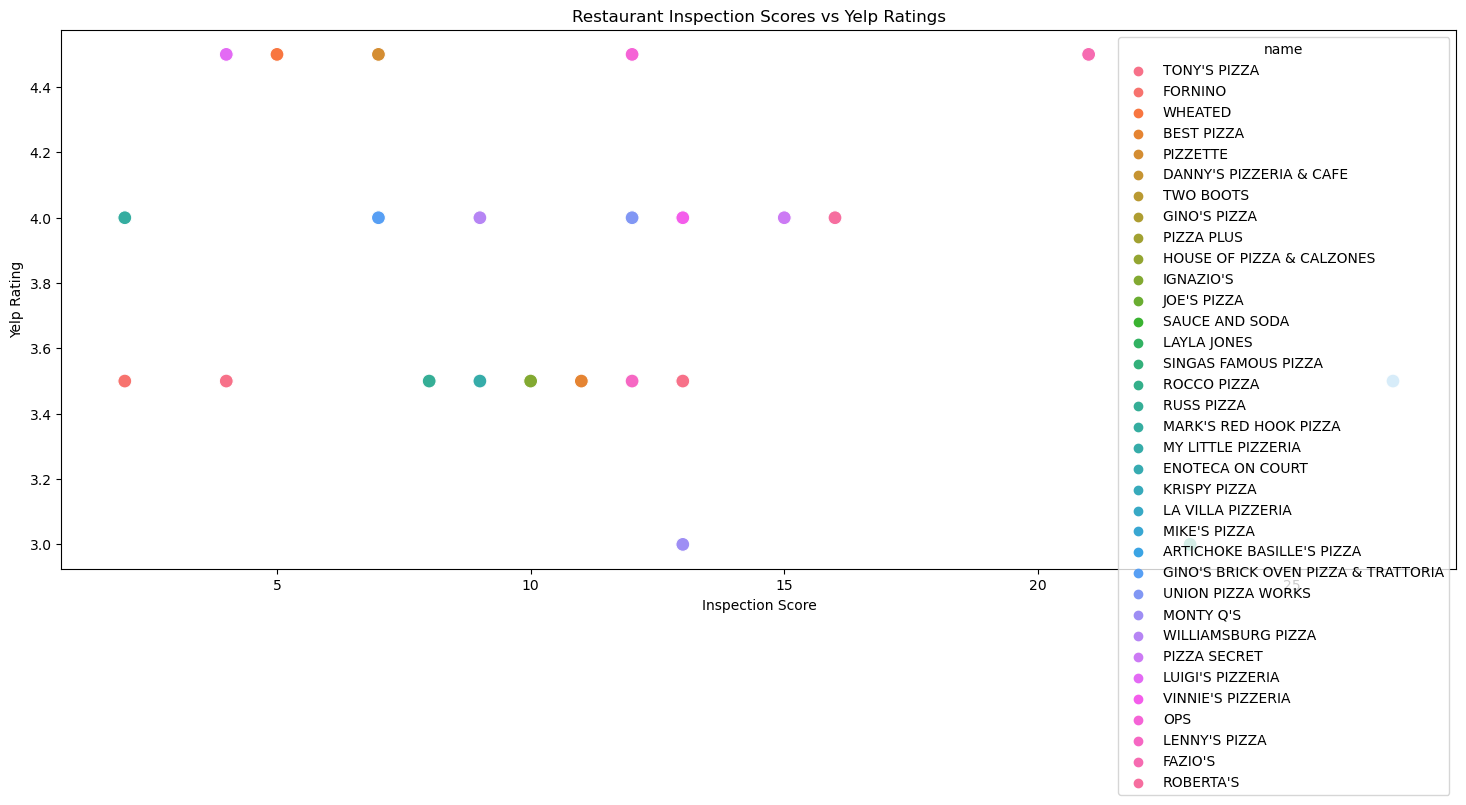

In [38]:
# Plotting
plt.figure(figsize=(18, 7))
sns.scatterplot(x='SCORE', y='rating', data=df_filtered, hue='name', s=100)
plt.title('Restaurant Inspection Scores vs Yelp Ratings')
plt.xlabel('Inspection Score')
plt.ylabel('Yelp Rating')
plt.show()

In [39]:
# Filtering out the restaurants with more review counts and better scores
df_filtered = merged_df[(merged_df['review_count'] >= 200)]

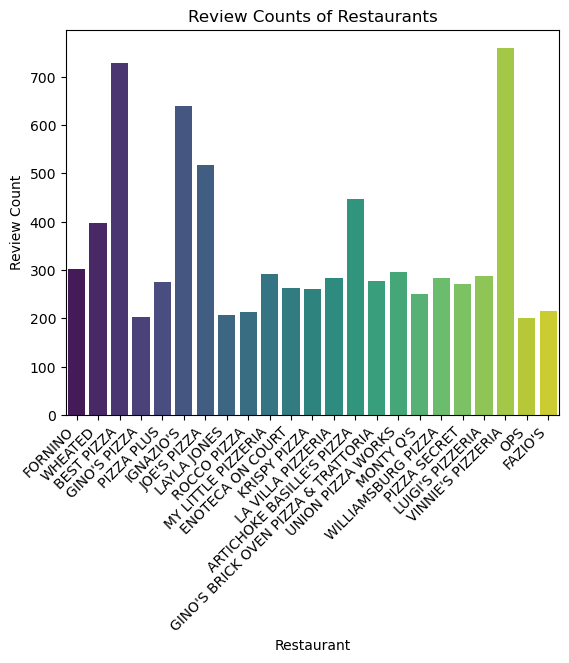

In [40]:
# Bar plot for review counts
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='name', y='review_count', data=df_filtered, palette='viridis')
plt.title('Review Counts of Restaurants')
plt.xlabel('Restaurant')
plt.ylabel('Review Count')
plt.xticks(rotation=45, ha='right');

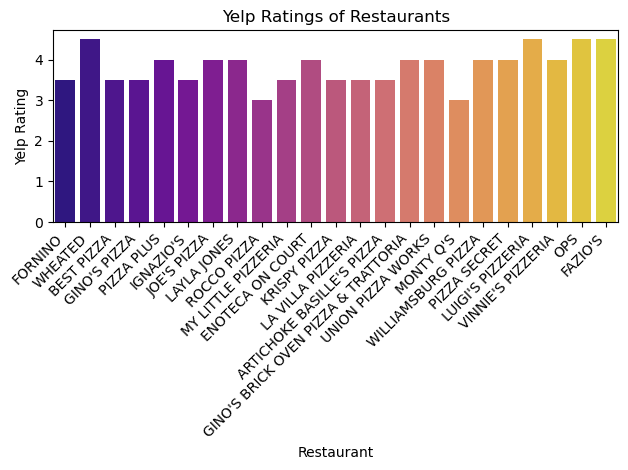

In [41]:
# Bar plot for Yelp ratings
plt.subplot(1, 1, 1)
sns.barplot(x='name', y='rating', data=df_filtered, palette='plasma')
plt.title('Yelp Ratings of Restaurants')
plt.xlabel('Restaurant')
plt.ylabel('Yelp Rating')
plt.xticks(rotation=45, ha='right')
# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()

# **Hypothesis Testing**

## **Hypothesis Test 1:Try to find a correlation between ratings and review counts on YELP**

- The null hypothesis for this question would be that the rating does not significantly affect the number of reviews on Yelp for pizza restaurants in Brooklyn NY

- The alternative hypothesis for this question would be that the rating does significantly affect the number of reviews on Yelp for the pizza restaurants in Brooklyn NY.

In [42]:
# Performing Pearsonr correlation test
correlation, p_value = pearsonr(merged_df['review_count'], merged_df['rating'])

# Print results
print(f'Correlation: {correlation:.2f}')
print(f'P-value: {p_value:.4f}')

# Check for significance based on the p-value
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('There is no significant correlation.')

Correlation: -0.13
P-value: 0.3518
There is no significant correlation.


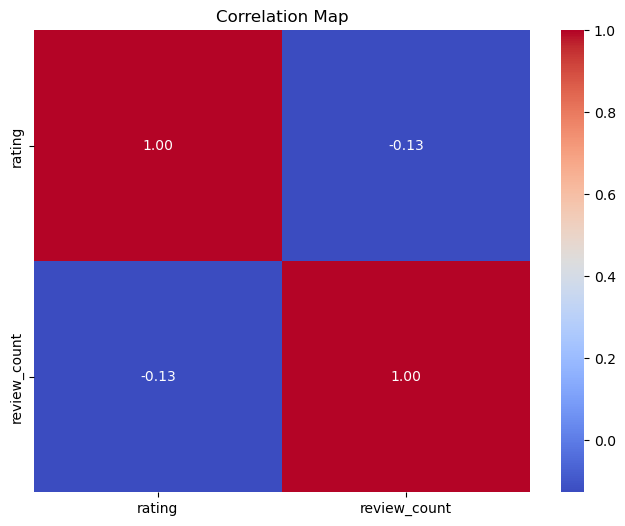

In [43]:
numeric_columns = ['rating', 'review_count']

mdf_numeric = merged_df[numeric_columns].apply(pd.to_numeric, errors='coerce').dropna()

c_matrix = mdf_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map')
plt.show()

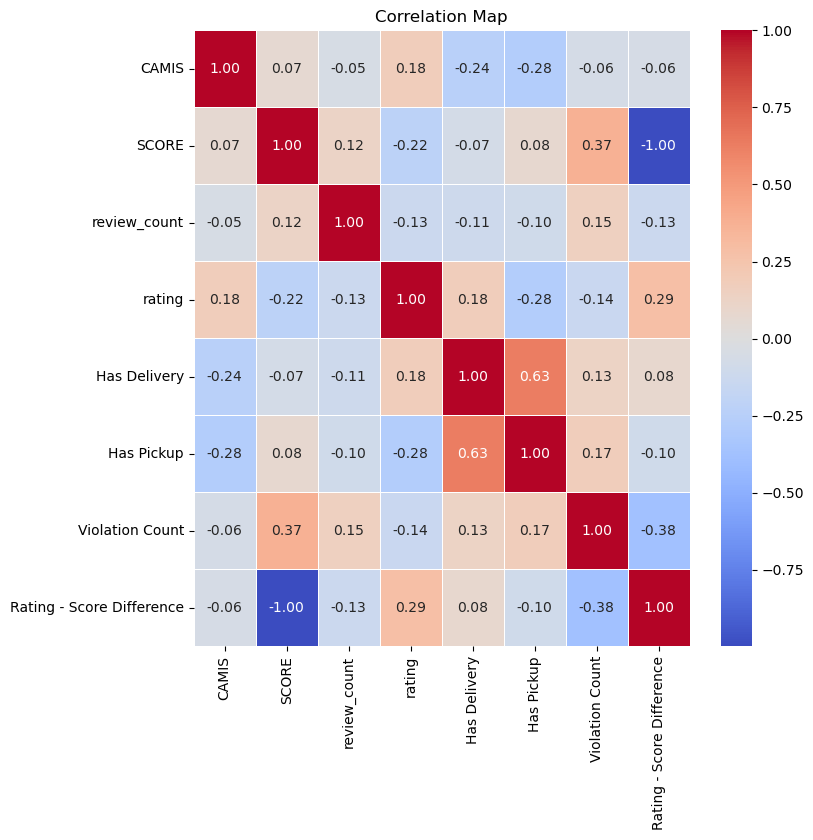

In [44]:
# Computing a correlation matrix to check for any correlation
correlation_matrix = merged_df.corr()

# Plot the correlation heatmap using seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Map')
plt.show()

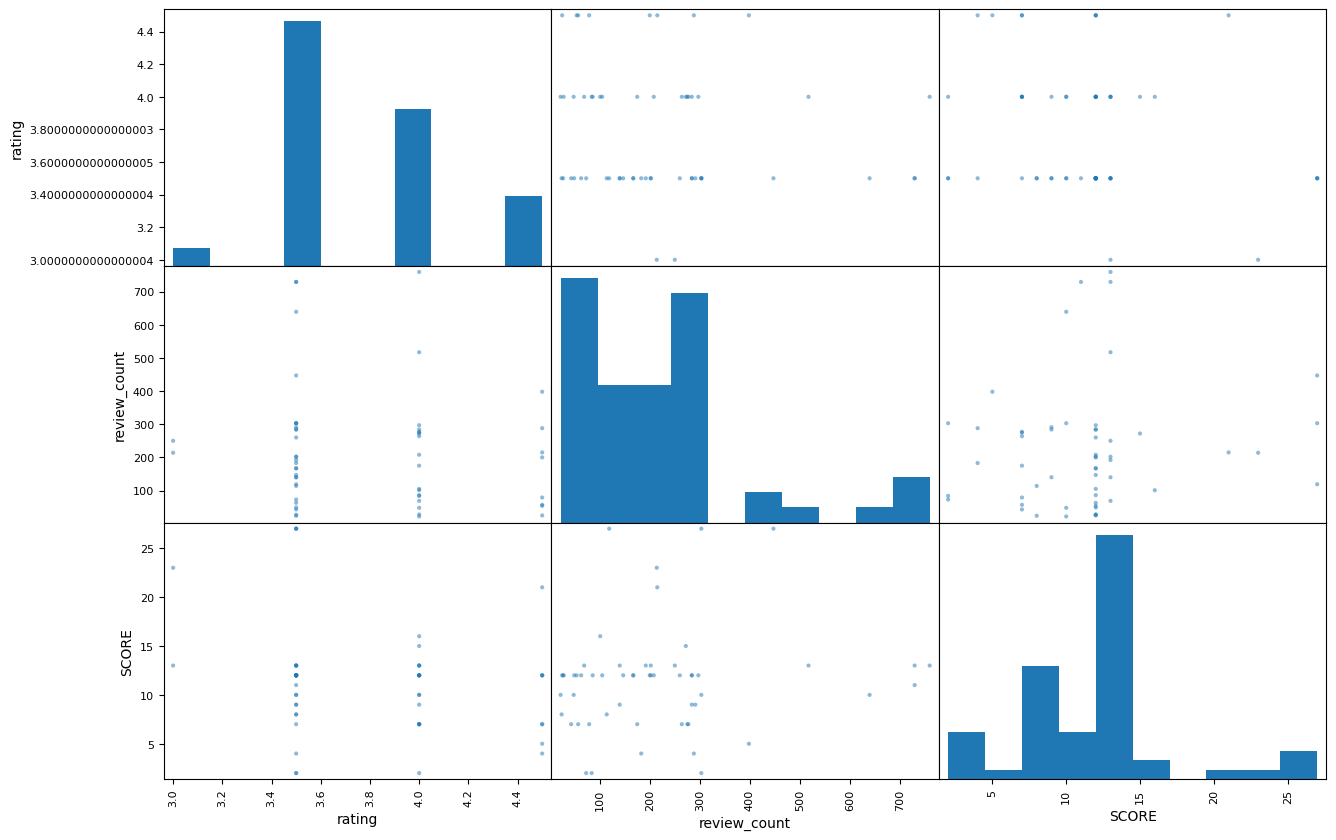

In [45]:
#create a scatter plot matrix for the merged dataframe
pd.plotting.scatter_matrix(merged_df[['rating','review_count', 'SCORE']], 
                           figsize=(15, 10));

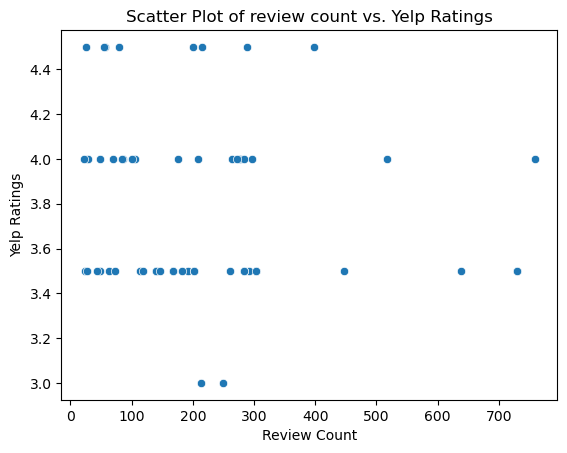

In [46]:
# Visualizing the correlation between review count and Yelp Ratings
sns.scatterplot(x=merged_df['review_count'], y=merged_df['rating'])
plt.title('Scatter Plot of review count vs. Yelp Ratings')
plt.xlabel('Review Count')
plt.ylabel('Yelp Ratings')
plt.show()

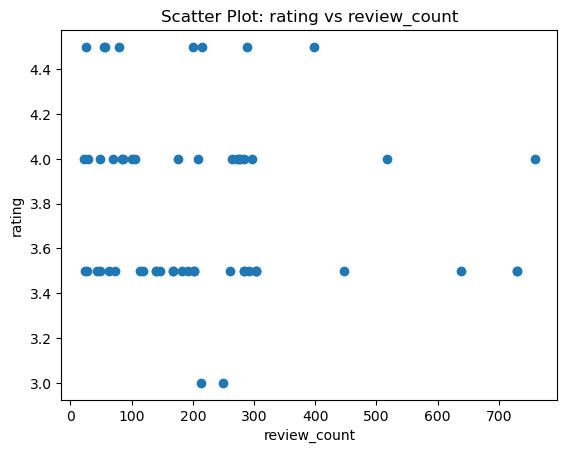

In [47]:
# Scatterplot 
plt.scatter(merged_df['review_count'], merged_df['rating'])
plt.xlabel('review_count')
plt.ylabel('rating')
plt.title('Scatter Plot: rating vs review_count')
plt.show()

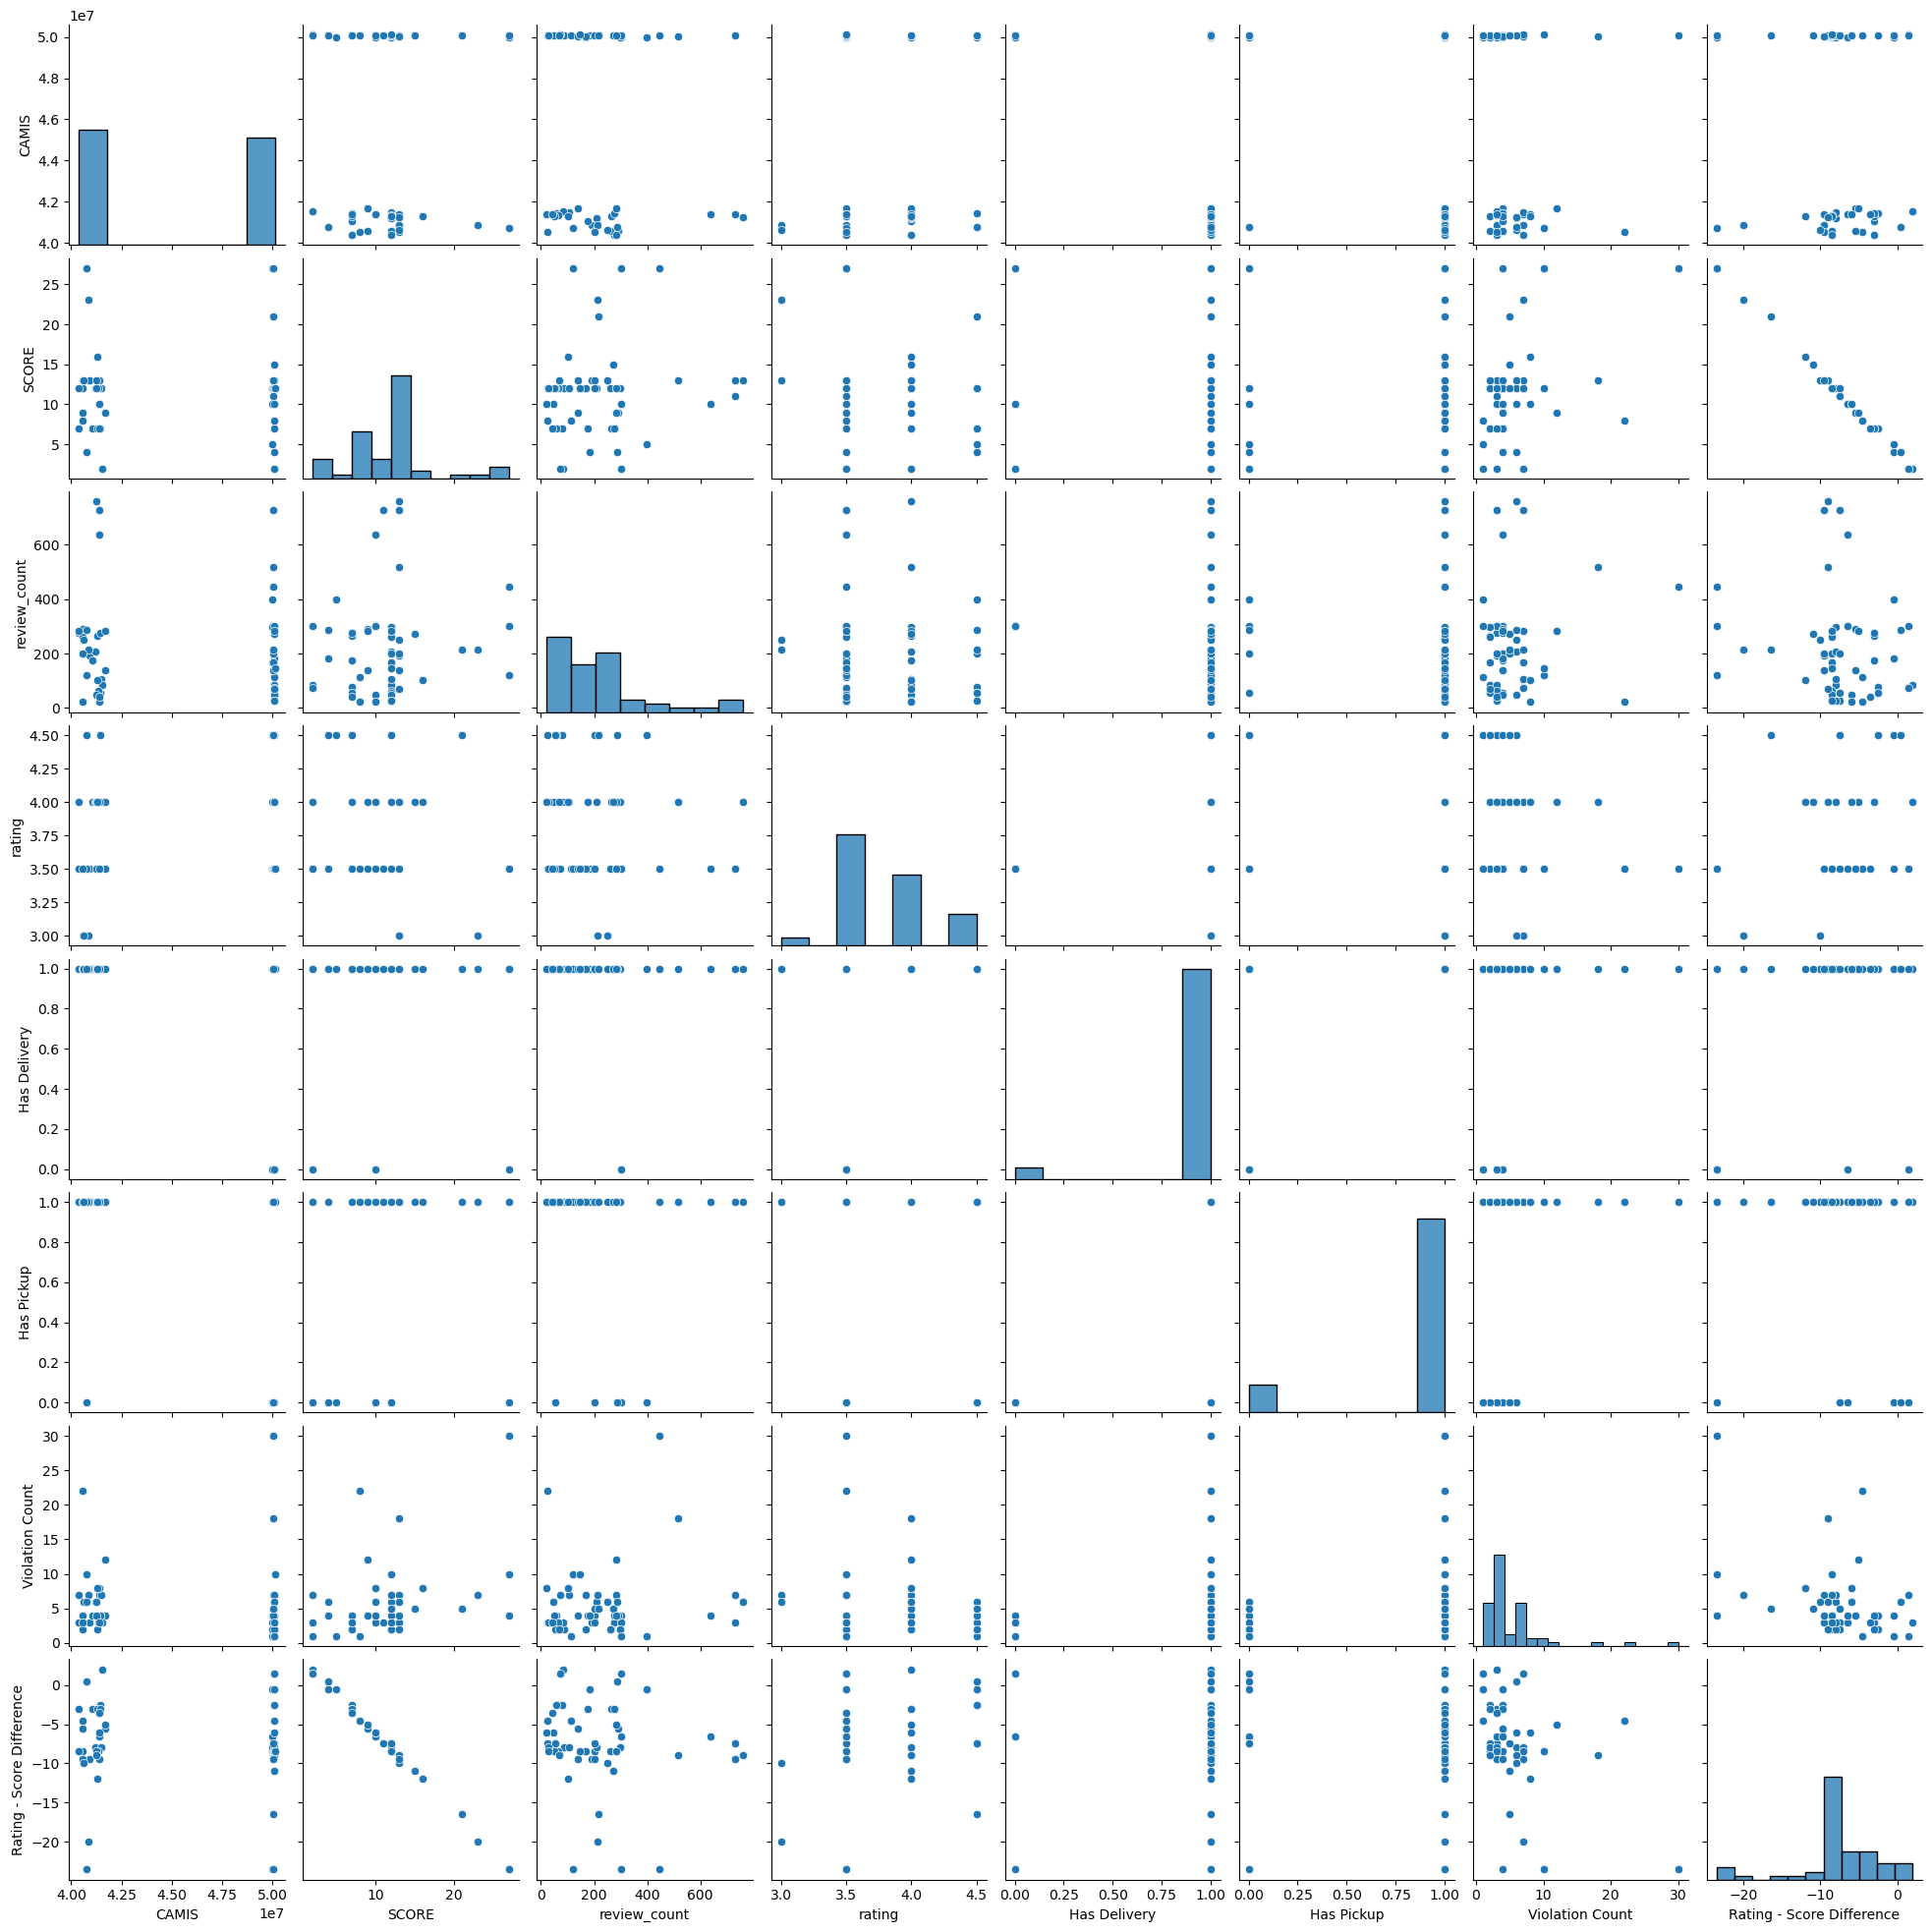

In [48]:
# Pairplot of the merged dataframe
sns.pairplot(merged_df)
plt.show()

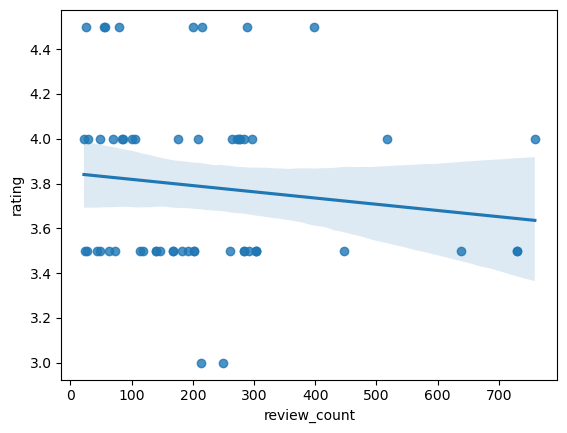

In [49]:
# Reggesion plot
sns.regplot(x='review_count', y='rating', data=merged_df)
plt.show()

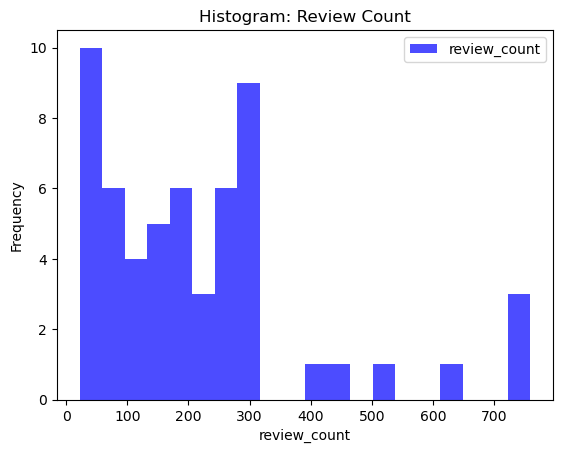

In [50]:
# Histogram 
plt.hist(merged_df['review_count'], bins=20, color='blue', alpha=0.7, label='review_count')
plt.xlabel('review_count')
plt.ylabel('Frequency')
plt.title('Histogram: Review Count')
plt.legend()
plt.show()

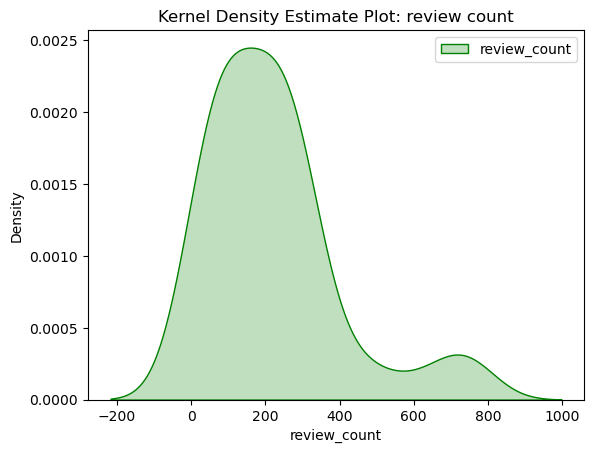

In [51]:
# Kernel Density Estimate Plot
sns.kdeplot(merged_df['review_count'], shade=True, color='green', label='review_count')
plt.xlabel('review_count')
plt.ylabel('Density')
plt.title('Kernel Density Estimate Plot: review count')
plt.legend()
plt.show()

## **Hypothesis Test 2:Try to find correlation between the inspection scores and the review counts on Yelp**

- Null Hypothesis: There is no significant correlation between the inspection score and the review count on Yelp

- Alternative Hypothesis: There is a significant correlation between the inspection score and the review count on Yelp.

In [52]:
review_count = merged_df['review_count']
score = merged_df['SCORE']

# Calculate IQR
Q1 = review_count.quantile(0.25)
Q3 = review_count.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (review_count < Q1 - 1.5 * IQR) | (review_count > Q3 + 1.5 * IQR)

# Print outliers
print("Outliers:")
print(merged_df[outliers])

Outliers:
       CAMIS                DBA      BORO            STREET  \
3   50056825         BEST PIZZA  Brooklyn          AVENUE O   
5   41411423         BEST PIZZA  Brooklyn  HAVEMEYER STREET   
14  41393052          IGNAZIO'S  Brooklyn      WATER STREET   
45  41250435  VINNIE'S PIZZERIA  Brooklyn    BEDFORD AVENUE   

   CUISINE DESCRIPTION INSPECTION DATE  \
3                Pizza      02/28/2022   
5                Pizza      03/16/2023   
14               Pizza      05/08/2023   
45               Pizza      12/06/2023   

                                             ACTION VIOLATION CODE  \
3   Violations were cited in the following area(s).            09B   
5   Violations were cited in the following area(s).            04K   
14  Violations were cited in the following area(s).            02G   
45  Violations were cited in the following area(s).            02G   

                                VIOLATION DESCRIPTION  SCORE  ... rating  \
3                        Thawing pro

In [53]:
# Perform Pearson correlation test
if len(merged_df['review_count']) < 2 or len(merged_df['SCORE']) < 2:
    print("Not enough data points to perform the correlation test.")
else:
    # Perform Pearson correlation test
    correlation, p_value = pearsonr(merged_df['review_count'], merged_df['SCORE'])

    # Print results
    print(f'Correlation: {correlation:.2f}')
    print(f'P-value: {p_value:.4f}')

    # Check for significance based on the p-value
    if p_value < 0.05:
        print('The correlation is statistically significant.')
    else:
        print('There is no significant correlation.')

Correlation: 0.12
P-value: 0.3778
There is no significant correlation.


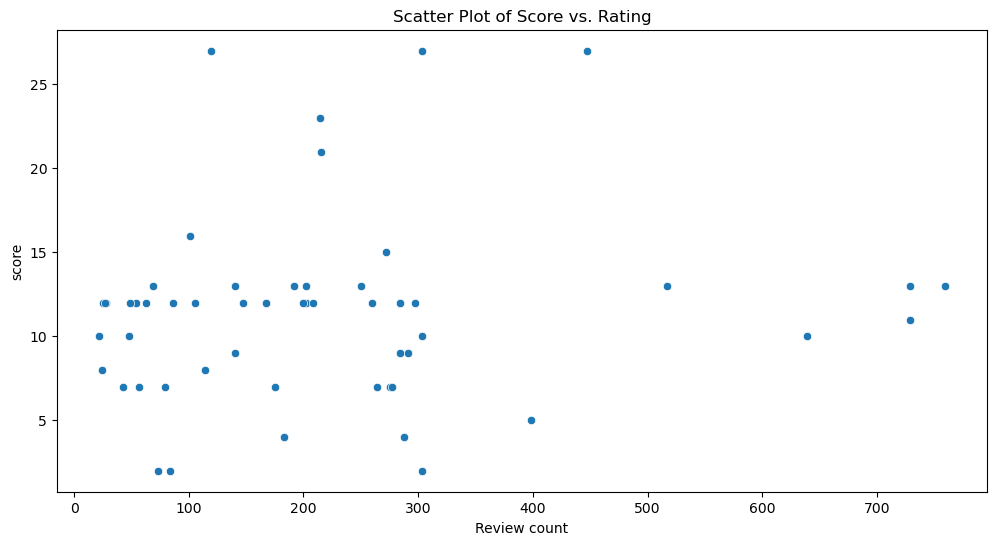

In [54]:
# Scatter Plot compairing review counts with inspection scores
plt.figure(figsize=(12, 6))
sns.scatterplot(x='review_count', y='SCORE', data=merged_df)
plt.title('Scatter Plot of Score vs. Rating')
plt.xlabel('Review count')
plt.ylabel('score')
plt.show()

## **Hypothesis Test 3:Try to find correlation between the inspection scores and the ratings on Yelp**

- Null Hypothesis: There is no significant correlation between the inspection scores and the ratings on Yelp.

- Alternative Hypothesis: There is a significant correlation between the inspection scores and the ratings on Yelp.

In [55]:
# Perform Pearson correlation test
if len(merged_df['rating']) < 2 or len(merged_df['SCORE']) < 2:
    print("Not enough data points to perform the correlation test.")
else:
    # Perform Pearson correlation test
    correlation, p_value = pearsonr(merged_df['rating'], merged_df['SCORE'])

    # Print results
    print(f'Correlation: {correlation:.2f}')
    print(f'P-value: {p_value:.4f}')

    # Check for significance based on the p-value
    if p_value < 0.05:
        print('The correlation is statistically significant.')
    else:
        print('There is no significant correlation.')

Correlation: -0.22
P-value: 0.1019
There is no significant correlation.


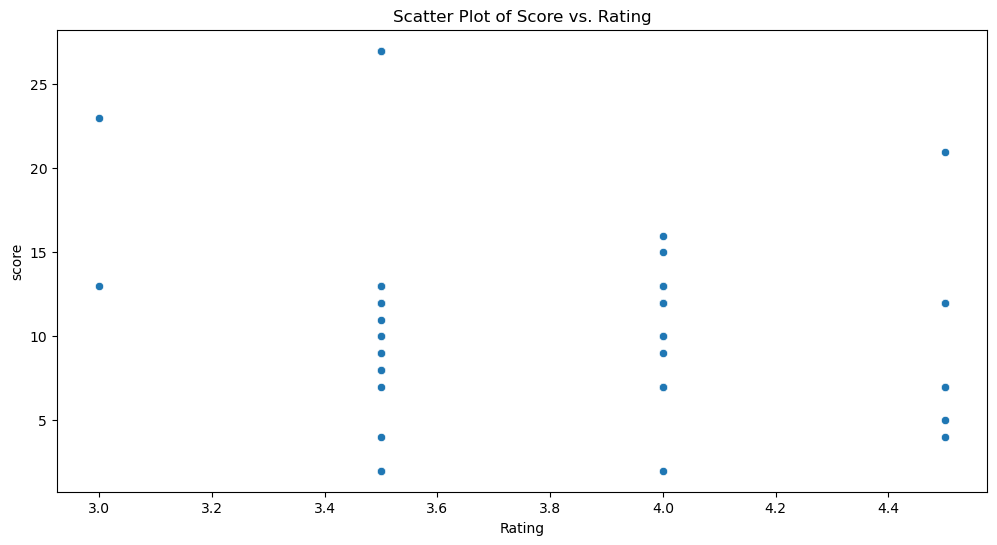

In [56]:
# Scatter Plot compairing review counts with inspection scores
plt.figure(figsize=(12, 6))
sns.scatterplot(x='rating', y='SCORE', data=merged_df)
plt.title('Scatter Plot of Score vs. Rating')
plt.xlabel('Rating')
plt.ylabel('score')
plt.show()

# **Summary of Hypothesis Testing results**



In this notebook, we conducted multiple hypothesis tests to explore potential correlations between ratings and review counts, and inspection scores with review counts. Despite our efforts, none of the tests revealed statistically significant correlations between the variables under investigation. So as far as Pizza restaurants in Brooklyn, NY, there is no correlation that supports a theory of better inspection scores mean better ratings on YELP.